## Advanced Pandas, Basic Python Viz and Exercise

### Exercise
1. Use the same dataframes you generated or copied to this directory from the 03 Exercise:
    1. Extract of any SQL database 
    1. Imported file from your capstone work
    1. Any other data from other exercises you have aleady used
1. Import into Pandas
1. Generate at least three additional dataframes with analytics introduced in this notebook
    1. Melt
    1. Pivot
    1. Quantile
    1. Aggregations
1. Build at least three  visualizations supported by Pandas directly using prior analytics from the 03 Exercise or new analytics from this exercise

In [ ]:
!pip install openpyxl

In [2]:
import pandas as pd

## Get the data

### Read a CSV file from a website into a DataFrame

In [3]:
url = 'https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD'
mortality_data = pd.read_csv(url)

In [4]:
type(mortality_data)

pandas.core.frame.DataFrame

In [6]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        476 non-null    int64  
 1   Age Group   476 non-null    object 
 2   Death Rate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


<AxesSubplot:xlabel='Year'>

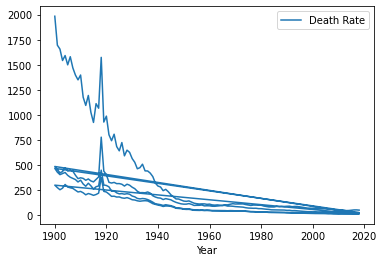

In [5]:
mortality_data.plot.line(x="Year", y = "Death Rate")

In [7]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [8]:
# SELECT [Age Group] , COUNT(*) GROUP BY Age Group
mortality_data[['Age Group']].value_counts()

Age Group  
1-4 Years      119
10-14 Years    119
15-19 Years    119
5-9 Years      119
dtype: int64

### Save and restore a DataFrame

In [9]:
mortality_data.to_pickle('mortality_data.pkl')

In [10]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [11]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## Examine and clean the data

In [12]:
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:    1428
Shape:   (476, 3)


### Use the columns attribute to replace spaces with nothing


In [13]:
mortality_data.columns = mortality_data.columns.str.replace(' ', '')
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [14]:
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [17]:
mortality_data.DeathRate.hist?

Signature:
mortality_data.DeathRate.hist(
    by=None,
    ax=None,
    grid: bool = True,
    xlabelsize: Optional[int] = None,
    xrot: Optional[float] = None,
    ylabelsize: Optional[int] = None,
    yrot: Optional[float] = None,
    figsize: Optional[Tuple[int, int]] = None,
    bins: Union[int, Sequence[int]] = 10,
    backend: Optional[str] = None,
    legend: bool = False,
    **kwargs,
)
Docstring:
Draw histogram of the input series using matplotlib.

Parameters
----------
by : object, optional
    If passed, then used to form histograms for separate groups.
ax : matplotlib axis object
    If not passed, uses gca().
grid : bool, default True
    Whether to show axis grid lines.
xlabelsize : int, default None
    If specified changes the x-axis label size.
xrot : float, default None
    Rotation of x axis labels.
ylabelsize : int, default None
    If specified changes the y-axis label size.
yrot : float, default None
    Rotation of y axis labels.
figsize : tuple, default None

<AxesSubplot:>

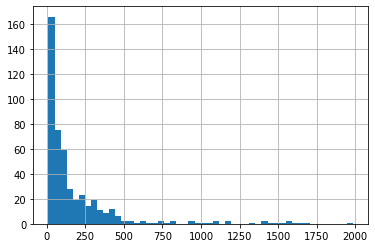

In [22]:
mortality_data.DeathRate.hist(bins=50)

In [23]:
mortality_data.describe(include='O')

,AgeGroup
count,476
unique,4
top,5-9 Years
freq,119


In [24]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


## Access the data

In [25]:
mortality_data.query("Year == 2000 and AgeGroup != '1-4 Years'")

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


In [26]:
mortality_data.query('Year == 1900 or Year == 2000').head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
100,2000,1-4 Years,32.4
119,1900,5-9 Years,466.1
219,2000,5-9 Years,15.8
238,1900,10-14 Years,298.3


In [27]:
# use backticks if a column name contains spaces
mortality_data.query('Year == 2000 and `AgeGroup` != "1-4 Years"')

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


### Access a subset of rows and columns

In [28]:
mortality_data.query('Year == 1900').DeathRate.head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [29]:
mortality_data.query('Year == 1900')['DeathRate'].head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [30]:
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


### Apply statistical methods

In [31]:
mortality_data.DeathRate.mean()

192.92415966386554

In [32]:
mortality_data.DeathRate.median()

89.5

In [33]:
mortality_data[['AgeGroup','DeathRate']].max()

AgeGroup     5-9 Years
DeathRate       1983.8
dtype: object

In [34]:
mortality_data.count()

Year         476
AgeGroup     476
DeathRate    476
dtype: int64

In [35]:
[i/20 for i in range(0,20)]

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [36]:
mortality_data.quantile(0.5)

Year         1959.0
DeathRate      89.5
Name: 0.5, dtype: float64

In [37]:

mort_dist = mortality_data.quantile([i/20 for i in range(0,20)])
mort_dist["quantile"] = mort_dist.index
mort_dist


,Year,DeathRate,quantile
0.00,1900.00,11.400,0.00
0.05,1905.75,15.050,0.05
0.10,1911.50,21.500,0.10
0.15,1917.25,26.350,0.15
0.20,1923.00,31.800,0.20
0.25,1929.00,40.575,0.25
0.30,1935.00,45.050,0.30
0.35,1941.00,51.275,0.35
0.40,1947.00,63.800,0.40
0.45,1953.00,80.050,0.45


<AxesSubplot:xlabel='DeathRate'>

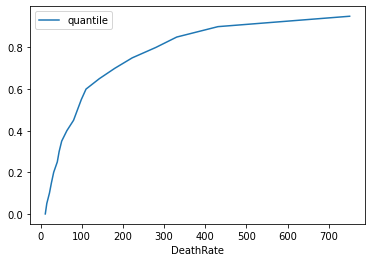

In [38]:
mort_dist.plot.line(y="quantile", x = "DeathRate")

In [39]:
mortality_data["CumDeathRate"] = mortality_data.DeathRate.cumsum()
mortality_data

,Year,AgeGroup,DeathRate,CumDeathRate
0,1900,1-4 Years,1983.8,1983.8
1,1901,1-4 Years,1695.0,3678.8
2,1902,1-4 Years,1655.7,5334.5
3,1903,1-4 Years,1542.1,6876.6
4,1904,1-4 Years,1591.5,8468.1
...,...,...,...,...
471,2014,15-19 Years,45.5,91631.7
472,2015,15-19 Years,48.3,91680.0
473,2016,15-19 Years,51.2,91731.2
474,2017,15-19 Years,51.5,91782.7


<AxesSubplot:>

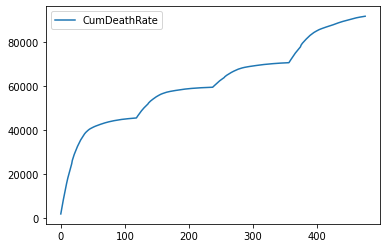

In [40]:
mortality_data.plot.line( y = "CumDeathRate")

### Use Python for column arithmetic

In [41]:
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [42]:
#mortality_data.head(4)
mortality_data.MeanCentered.describe()

count    4.760000e+02
mean     3.821406e-15
std      2.932242e+02
min     -1.815242e+02
25%     -1.523492e+02
50%     -1.034242e+02
75%      2.965084e+01
max      1.790876e+03
Name: MeanCentered, dtype: float64

In [43]:
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000

In [44]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3678.8,1502.07584
2,1902,1-4 Years,0.016557,5334.5,1462.77584
3,1903,1-4 Years,0.015421,6876.6,1349.17584


## Shape the data

### Set and use an index

In [45]:
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,CumDeathRate,MeanCentered
Year,,,,
1900,1-4 Years,0.019838,1983.8,1790.87584
1901,1-4 Years,0.016950,3678.8,1502.07584


In [46]:
mortality_data.reset_index(inplace=True)

In [47]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
# mortality_data = mortality_data.set_index('Year', verify_integrity=True)
mortality_data

,Year,AgeGroup,DeathRate,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3678.8,1502.07584
2,1902,1-4 Years,0.016557,5334.5,1462.77584
3,1903,1-4 Years,0.015421,6876.6,1349.17584
4,1904,1-4 Years,0.015915,8468.1,1398.57584
...,...,...,...,...,...
471,2014,15-19 Years,0.000455,91631.7,-147.42416
472,2015,15-19 Years,0.000483,91680.0,-144.62416
473,2016,15-19 Years,0.000512,91731.2,-141.72416
474,2017,15-19 Years,0.000515,91782.7,-141.42416


In [48]:
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'], verify_integrity=True)
mortality_data.head(2)

,,DeathRate,CumDeathRate,MeanCentered
Year,AgeGroup,,,
1900,1-4 Years,0.019838,1983.8,1790.87584
1901,1-4 Years,0.016950,3678.8,1502.07584


In [49]:
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

,Year,AgeGroup,DeathRate,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3678.8,1502.07584


### Pivot the data

In [50]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values=['DeathRate','MeanCentered'])
mortality_wide.head(3)

DeathRate                                   MeanCentered              \
AgeGroup 1-4 Years 10-14 Years 15-19 Years 5-9 Years    1-4 Years 10-14 Years   
Year                                                                            
1900      0.019838    0.002983    0.004848  0.004661   1790.87584   105.37584   
1901      0.016950    0.002736    0.004544  0.004276   1502.07584    80.67584   
1902      0.016557    0.002525    0.004215  0.004033   1462.77584    59.57584   

                                 
AgeGroup 15-19 Years  5-9 Years  
Year                             
1900       291.87584  273.17584  
1901       261.47584  234.67584  
1902       228.57584  210.37584

In [51]:
mortality_wide = mortality_data.pivot(
    index=['Year','MeanCentered'], columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)    

AgeGroup           1-4 Years  10-14 Years  15-19 Years  5-9 Years
Year MeanCentered                                                
1900 105.37584           NaN     0.002983          NaN        NaN
     273.17584           NaN          NaN          NaN   0.004661
     291.87584           NaN          NaN     0.004848        NaN

In [52]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

DeathRate                                   CumDeathRate              \
AgeGroup 1-4 Years 10-14 Years 15-19 Years 5-9 Years    1-4 Years 10-14 Years   
Year                                                                            
1900      0.019838    0.002983    0.004848  0.004661       1983.8     59864.0   
1901      0.016950    0.002736    0.004544  0.004276       3678.8     60137.6   
1902      0.016557    0.002525    0.004215  0.004033       5334.5     60390.1   

                               MeanCentered                                     
AgeGroup 15-19 Years 5-9 Years    1-4 Years 10-14 Years 15-19 Years  5-9 Years  
Year                                                                            
1900         71209.1   46070.0   1790.87584   105.37584   291.87584  273.17584  
1901         71663.5   46497.6   1502.07584    80.67584   261.47584  234.67584  
1902         72085.0   46900.9   1462.77584    59.57584   228.57584  210.37584

### Melt the data

In [53]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033


In [54]:
# get starting data


# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

,Year,1-4 Years,10-14 Years,15-19 Years,5-9 Years
0,1900,0.019838,0.002983,0.004848,0.004661
1,1901,0.016950,0.002736,0.004544,0.004276
2,1902,0.016557,0.002525,0.004215,0.004033
3,1903,0.015421,0.002682,0.004341,0.004147


In [55]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['1-4 Years','5-9 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,0.019838
1,1901,1-4 Years,0.016950
...,...,...,...
236,2017,5-9 Years,0.000116
237,2018,5-9 Years,0.000115


## Analyze the data

### Group the data

In [56]:
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,CumDeathRate,MeanCentered
AgeGroup,,,,
1-4 Years,1959,0.003832,37353.117647,190.301891
10-14 Years,1959,0.000938,67911.569748,-99.154412
15-19 Years,1959,0.001774,85460.104202,-15.549370
5-9 Years,1959,0.001173,56497.440336,-75.598109


In [58]:
mortality_data.groupby('AgeGroup').median()

,Year,DeathRate,CumDeathRate,MeanCentered
AgeGroup,,,,
1-4 Years,1959,0.001091,42409.4,-83.82416
10-14 Years,1959,0.000446,69110.8,-148.32416
15-19 Years,1959,0.001069,87096.4,-86.02416
5-9 Years,1959,0.000484,58040.5,-144.52416


In [57]:
mortality_data.groupby('Year').median().head(4)

,DeathRate,CumDeathRate,MeanCentered
Year,,,
1900,0.004755,52967.00,282.52584
1901,0.004410,53317.60,248.07584
1902,0.004124,53645.50,219.47584
1903,0.004244,53986.95,231.47584


In [59]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

DeathRate  CumDeathRate  MeanCentered
Year AgeGroup                                          
1900 1-4 Years            1             1             1
     10-14 Years          1             1             1
     15-19 Years          1             1             1
     5-9 Years            1             1             1
1901 1-4 Years            1             1             1

### Aggregate the data

In [60]:
mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup').agg(['mean','median','min','max','std'])

DeathRate                                        
                 mean    median       min       max       std
AgeGroup                                                     
1-4 Years    0.003832  0.001091  0.000240  0.019838  0.005005
10-14 Years  0.000938  0.000446  0.000139  0.003751  0.000884
15-19 Years  0.001774  0.001069  0.000448  0.007774  0.001384
5-9 Years    0.001173  0.000484  0.000114  0.004661  0.001275

In [61]:
AgeGS = mortality_data.groupby("AgeGroup")
type(AgeGS)

pandas.core.groupby.generic.DataFrameGroupBy

In [62]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.003832,0.001091,0.005005,117
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117
5-9 Years,0.001173,0.000484,0.001275,115


In [63]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,0.000062,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,0.000044,4
1902,0.006832,0.004124,0.006527,0.002525,0.016557,0.000043,4


In [64]:
def fun_1q(foo): return foo.quantile(0.75)

fun_1q(mortality_data.DeathRate)

0.0022257500000000003

In [72]:
fun_1q(mortality_wide[['1-4 Years']])

1-4 Years    0.005773
Name: 0.75, dtype: float64

## Visualize the data

In [73]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033
1903,0.015421,0.002682,0.004341,0.004147
1904,0.015915,0.003052,0.004714,0.004250
...,...,...,...,...
2014,0.000240,0.000140,0.000455,0.000115
2015,0.000249,0.000146,0.000483,0.000117
2016,0.000253,0.000146,0.000512,0.000122


<AxesSubplot:xlabel='Year'>

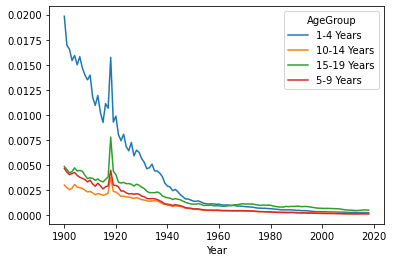

In [74]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [79]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

pandas.plotting._core.PlotAccessor

<AxesSubplot:xlabel='Year'>

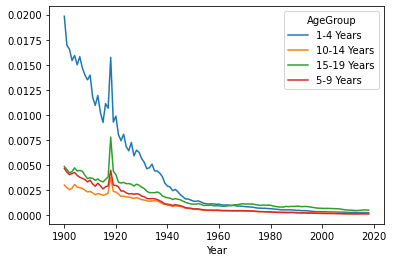

In [80]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [75]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std'])

,mean,median,std
AgeGroup,,,
1-4 Years,0.003832,0.001091,0.005005
10-14 Years,0.000938,0.000446,0.000884
15-19 Years,0.001774,0.001069,0.001384
5-9 Years,0.001173,0.000484,0.001275


<AxesSubplot:ylabel='AgeGroup'>

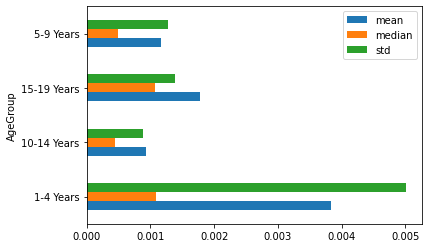

In [81]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.barh()

<AxesSubplot:xlabel='AgeGroup'>

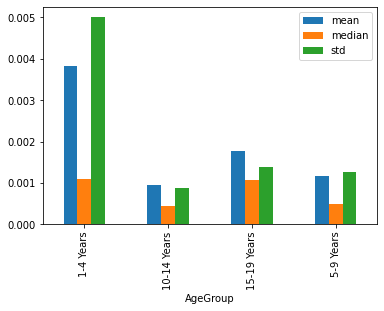

In [82]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.bar()

In [83]:
import seaborn as sns

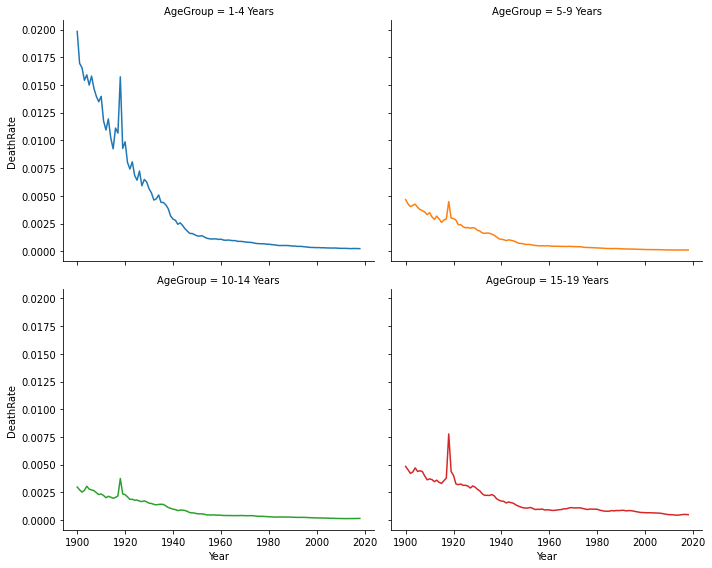

In [84]:
sns.relplot(data=mortality_data, 
            kind='line', x='Year', y='DeathRate', hue='AgeGroup', 
            height=4, aspect=1.25, 
            col='AgeGroup', col_wrap=2, legend=False)